In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
rain = pd.read_csv('Downloads/rain.csv', index_col=[1], parse_dates=True)
rain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1813-01-01 to 1912-01-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   obsno   100 non-null    int64  
 1   rain    100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.3 KB


In [3]:
rain = rain.drop('obsno', axis=1)
rain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1813-01-01 to 1912-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rain    100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [4]:
rain.shape #100,1
rain.head()
rain.describe()

,rain
count,100.000000
mean,24.823900
std,4.214531
min,16.930000
25%,22.202500
50%,23.870000
75%,27.510000
max,38.100000


Text(0.5, 1.0, 'Data = rain')

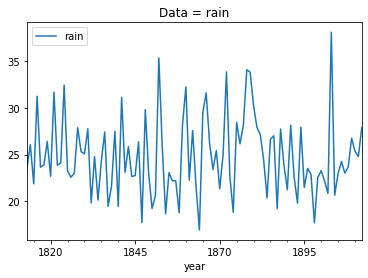

In [5]:
#Lineplot
rain.plot()
plt.title('Data = rain')

Text(0.5, 1.0, 'Histogram of rain Data')

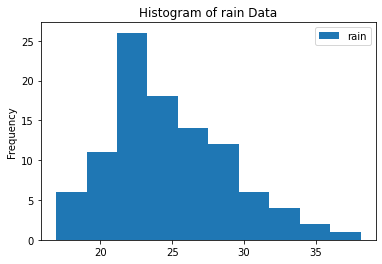

In [6]:
#Histogram
rain.plot(kind='hist')
plt.title('Histogram of rain Data')

Text(0.5, 1.0, 'Density plot of rain Data')

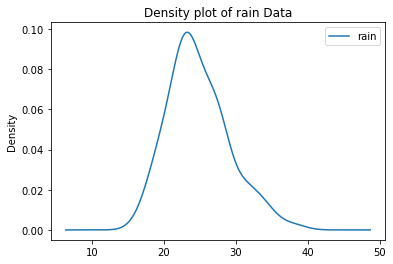

In [7]:
#Density plot
rain.plot(kind='kde')
plt.title('Density plot of rain Data')


Text(0.5, 1.0, 'Boxplot of rain Data')

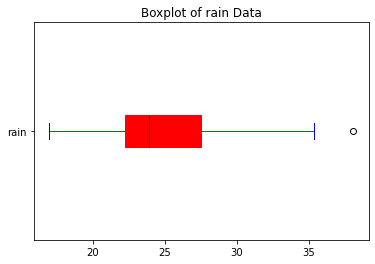

In [8]:
#Boxplot
props2 = dict(boxes = 'red', whiskers ='green', medians = 'black', caps = 'blue')
rain.plot.box(color = props2 , patch_artist = True, vert = False)
plt.title('Boxplot of rain Data')

In [9]:
#Decompose
from statsmodels.tsa.seasonal import seasonal_decompose


In [10]:
# Season Decompose with Multiplicative model
rain_dec_m = seasonal_decompose(rain, model='multiplicative')

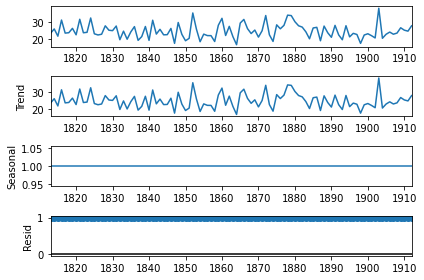

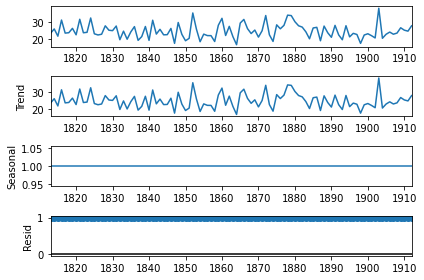

In [11]:
rain_dec_m.plot() #No trend & No seasonality, residuals is 1 for all observations

In [12]:
rain_dec_m.observed
rain_dec_m.trend
rain_dec_m.seasonal
rain_dec_m.resid

year
1813-01-01    1.0
1814-01-01    1.0
1815-01-01    1.0
1816-01-01    1.0
1817-01-01    1.0
             ... 
1908-01-01    1.0
1909-01-01    1.0
1910-01-01    1.0
1911-01-01    1.0
1912-01-01    1.0
Name: resid, Length: 100, dtype: float64

In [13]:
# Season Decompose with Additive model
rain_dec_a = seasonal_decompose(rain, model='additive')

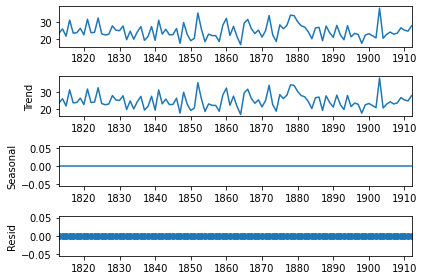

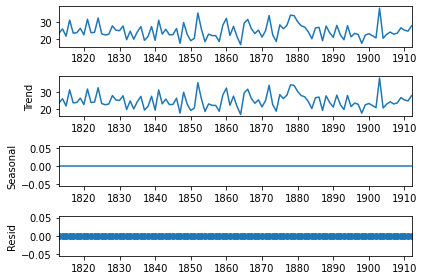

In [14]:
rain_dec_a.plot() #No trend & No seasonality, residuals is 0 for all observations

In [15]:
rain_dec_a.observed
rain_dec_a.trend
rain_dec_a.seasonal
rain_dec_a.resid

year
1813-01-01    0.0
1814-01-01    0.0
1815-01-01    0.0
1816-01-01    0.0
1817-01-01    0.0
             ... 
1908-01-01    0.0
1909-01-01    0.0
1910-01-01    0.0
1911-01-01    0.0
1912-01-01    0.0
Name: resid, Length: 100, dtype: float64

In [16]:
#Test for stationarity
from statsmodels.tsa.stattools import adfuller
rain_adf = adfuller(rain)

In [17]:
print('ADF Statistic: %f' % rain_adf[0])
print('p-value: %f' % rain_adf[1])
print('Critical Values:')
for key, value in rain_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.502000
p-value: 0.000000
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583


In [18]:
#p-value: 0.0 ie < 0.05, Null Hypothesis rejected, so,  Data is stationary
#H0: Data is not stationary


In [19]:
#Moving average/Rolloing average @2
rain_ma2 = rain.rolling(window=2).mean()
print(rain_ma2) # 1st obs will be na

              rain
year              
1813-01-01     NaN
1814-01-01  24.815
1815-01-01  23.965
1816-01-01  26.550
1817-01-01  27.445
...            ...
1908-01-01  23.340
1909-01-01  25.210
1910-01-01  26.055
1911-01-01  25.075
1912-01-01  26.335

[100 rows x 1 columns]


In [20]:
#Residuals / errors
rain_ma2_res = rain - rain_ma2
rain_ma2_res = rain_ma2_res.dropna() #na is trouble to get acf & pacf
rain_ma2_res.head()

,rain
year,
1814-01-01,1.255
1815-01-01,-2.105
1816-01-01,4.690
1817-01-01,-3.795
1818-01-01,0.115


Text(0.5, 1.0, 'Histogram Residuals @MA2')

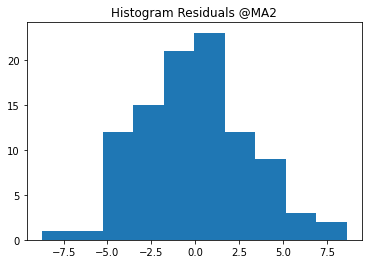

In [21]:
#Plotting histogram for residuals
plt.hist(rain_ma2_res)
plt.title('Histogram Residuals @MA2')

In [22]:
#Squaring residuals/ errors
rain_ma2_se = pow(rain_ma2_res,2)
rain_ma2_se.head()

,rain
year,
1814-01-01,1.575025
1815-01-01,4.431025
1816-01-01,21.996100
1817-01-01,14.402025
1818-01-01,0.013225


In [23]:
#average/mean of squared residuals/ errors
rain_ma2_mse = (rain_ma2_se.sum())/len(rain_ma2_se)
print(rain_ma2_mse) #9.439844

rain    9.439844
dtype: float64


In [24]:
#Root of average/mean of squared residuals/ errors
rain_ma2_rmse = sqrt(rain_ma2_mse) 
print(rain_ma2_rmse) #3.072432984532689

3.0724329845326888


In [25]:
#Another method to find RMSE
rain_ma2 = rain.rolling(window=2).mean()
rain_ma2 = rain_ma2.dropna()
ma2_rmse = sqrt(mean_squared_error(rain[1:],rain_ma2))
print(ma2_rmse) #3.072432984532689

3.0724329845326888


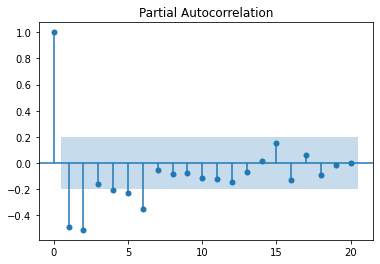

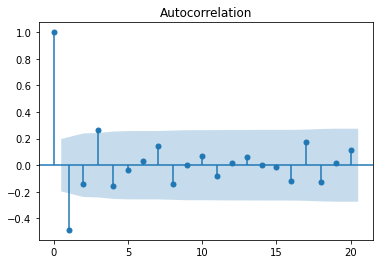

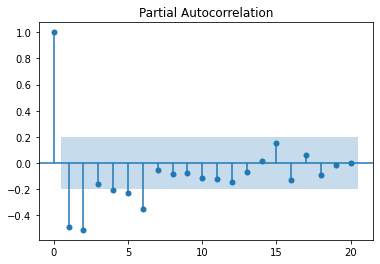

In [26]:
#Plotting acf & pacf 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(rain_ma2_res) 
plot_pacf(rain_ma2_res)

In [27]:
#Moving average/Rolloing average @3
rain_ma3 = rain.rolling(window=3).mean()
print(rain_ma3) # 1st and 2nd obs will be na

                 rain
year                 
1813-01-01        NaN
1814-01-01        NaN
1815-01-01  23.830000
1816-01-01  26.390000
1817-01-01  25.583333
...               ...
1908-01-01  23.646667
1909-01-01  24.476667
1910-01-01  25.260000
1911-01-01  25.633333
1912-01-01  26.010000

[100 rows x 1 columns]


In [28]:
#Residuals / errors
rain_ma3_res = rain - rain_ma3
rain_ma3_res = rain_ma3_res.dropna() #na is trouble to get acf & pacf
rain_ma3_res.head()

,rain
year,
1815-01-01,-1.970000
1816-01-01,4.850000
1817-01-01,-1.933333
1818-01-01,-2.376667
1819-01-01,1.763333


Text(0.5, 1.0, 'Histogram Residuals @MA3')

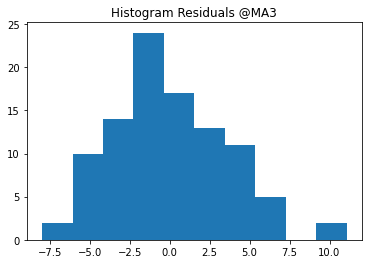

In [29]:
#Plotting histogram for residuals
plt.hist(rain_ma3_res)
plt.title('Histogram Residuals @MA3')

In [30]:
#Squaring residuals/ errors
rain_ma3_se = pow(rain_ma3_res,2)
rain_ma3_se.head()

,rain
year,
1815-01-01,3.880900
1816-01-01,23.522500
1817-01-01,3.737778
1818-01-01,5.648544
1819-01-01,3.109344


In [31]:
#average/mean of squared residuals/ errors
rain_ma3_mse = (rain_ma3_se.sum())/len(rain_ma3_se)
print(rain_ma3_mse) #12.902231

rain    12.902231
dtype: float64


In [32]:
#Another method to find RMSE
rain_ma3 = rain.rolling(window=3).mean()
rain_ma3 = rain_ma3.dropna()
rain_ma3_rmse = sqrt(mean_squared_error(rain[2:],rain_ma3))
print(rain_ma3_rmse) #3.5919675916046803

3.5919675916046803


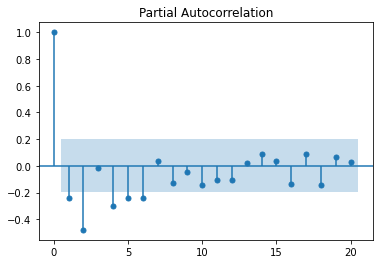

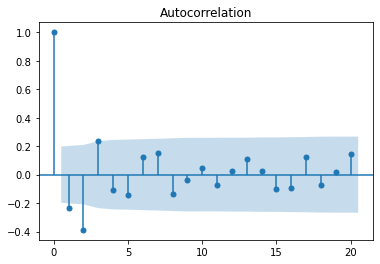

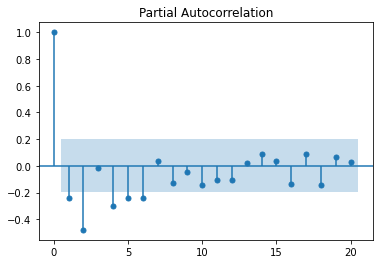

In [33]:
#Plotting acf & pacf 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(rain_ma3_res)
plot_pacf(rain_ma3_res)

In [34]:
!pip install --user pmdarima

In [35]:
#from pyramid.arima import auto_arima
from pmdarima import auto_arima

In [36]:
#Applying autoarima
rain_mod1 = auto_arima(rain)
rain_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                        SARIMAX   Log Likelihood                -285.245
Date:                Sun, 05 Sep 2021   AIC                            574.490
Time:                        19:28:14   BIC                            579.701
Sample:                             0   HQIC                           576.599
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     24.8239      0.467     53.106      0.000      23.908      25.740
sigma2        17.5847      2.583      6.807      0.000      12.522      22.648
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):                 7.88
Prob(Q):                              0.50   Prob(JB):                         0.02
Heteroskedasticity (H):               1.29   Skew:                             0.67
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
#Residual given by the model
rain_mod1_res = rain_mod1.resid()
rain_mod1_res = pd.DataFrame(rain_mod1_res, index=rain.index)
rain_mod1_res

,0
year,
1813-01-01,-1.2639
1814-01-01,1.2461
1815-01-01,-2.9639
1816-01-01,6.4161
1817-01-01,-1.1739
...,...
1908-01-01,-1.1539
1909-01-01,1.9261
1910-01-01,0.5361


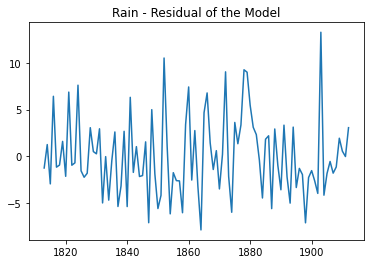

In [38]:
#Lineplot of residuals
plt.plot(rain_mod1_res)
plt.title('Rain - Residual of the Model')
plt.show()

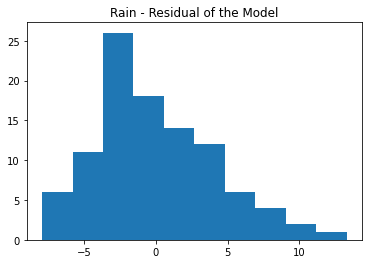

In [39]:
#Histogram of residuals
plt.hist(rain_mod1_res)
plt.title('Rain - Residual of the Model')
plt.show()

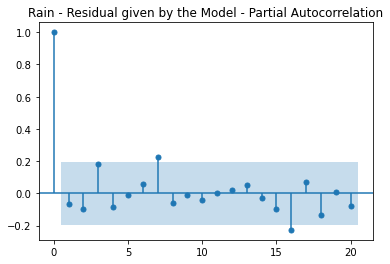

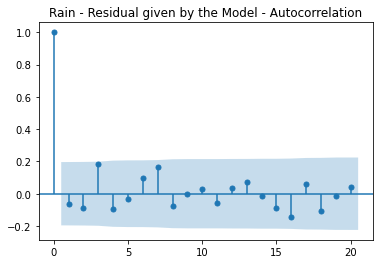

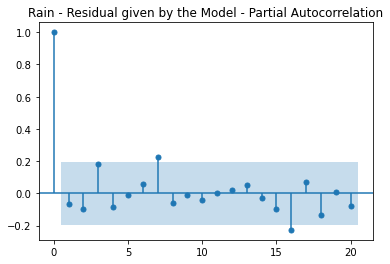

In [40]:
#Plotting acf & pacf - residual
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(rain_mod1_res, title='Rain - Residual given by the Model - Autocorrelation') 
plot_pacf(rain_mod1_res, title='Rain - Residual given by the Model - Partial Autocorrelation')

In [41]:
#Squaring residuals/ errors
rain_mod1_se = pow(rain_mod1_res,2)
rain_mod1_se.head()

,0
year,
1813-01-01,1.597443
1814-01-01,1.552765
1815-01-01,8.784703
1816-01-01,41.166339
1817-01-01,1.378041


In [42]:
#average/mean of squared residuals/ errors
rain_mod1_mse = (rain_mod1_se.sum())/len(rain_mod1_se)
print(rain_mod1_mse) #18.62254


0    17.584652
dtype: float64


In [43]:
#Root of average/mean of squared residuals/ errors
rain_mod1_rmse = sqrt(rain_mod1_mse) 
print(rain_mod1_rmse) #4.315384119871696


4.193405750699544


In [44]:
#Forecasting next 8 periods
rain_mod1_pred = rain_mod1.predict(n_periods=8)
rain_mod1_pred

array([24.8239, 24.8239, 24.8239, 24.8239, 24.8239, 24.8239, 24.8239,
       24.8239])

In [45]:
#Adding index and coverting to dataframe
rain_mod1_pred = pd.DataFrame(rain_mod1_pred, 
                              index=pd.date_range(start='1913-01-01', 
                                                  periods=8, freq='YS'))
rain_mod1_pred

,0
1913-01-01,24.8239
1914-01-01,24.8239
1915-01-01,24.8239
1916-01-01,24.8239
1917-01-01,24.8239
1918-01-01,24.8239
1919-01-01,24.8239
1920-01-01,24.8239


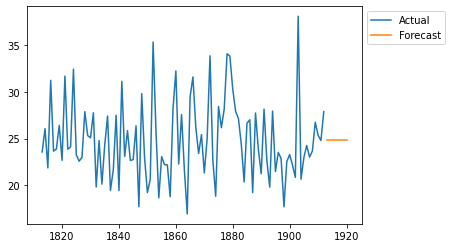

In [46]:
#Plot Actual & forecast
plt.plot(rain)
plt.plot(rain_mod1_pred)
plt.legend(['Actual','Forecast'], bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [47]:
#Model with single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
rain_ses = SimpleExpSmoothing(rain).fit()
rain_ses.summary()

C:\Program Files\ancondapython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Program Files\ancondapython\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Dep. Variable:,rain,No. Observations:,100
Model:,SimpleExpSmoothing,SSE,1758.465
Optimized:,True,AIC,290.703
Trend:,None,BIC,295.913
Seasonal:,None,AICC,291.124
Seasonal Periods:,None,Date:,"Sun, 05 Sep 2021"
Box-Cox:,False,Time:,19:28:17
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.4901e-08,alpha,True
initial_level,24.823898,l.0,True


In [48]:
#Residuals given by the model
rain_ses_res = rain_ses.resid
rain_ses_res

year
1813-01-01   -1.263898
1814-01-01    1.246102
1815-01-01   -2.963898
1816-01-01    6.416102
1817-01-01   -1.173898
                ...   
1908-01-01   -1.153898
1909-01-01    1.926102
1910-01-01    0.536102
1911-01-01   -0.033898
1912-01-01    3.056102
Length: 100, dtype: float64

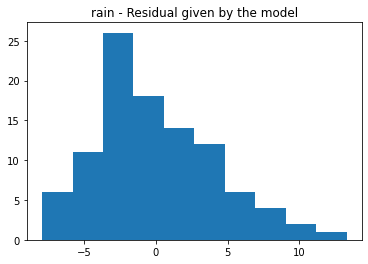

In [49]:
#Histogram of residuals
plt.hist(rain_ses_res)
plt.title('rain - Residual given by the model')
plt.show()

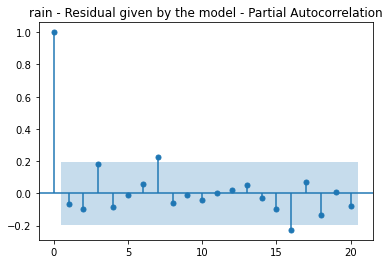

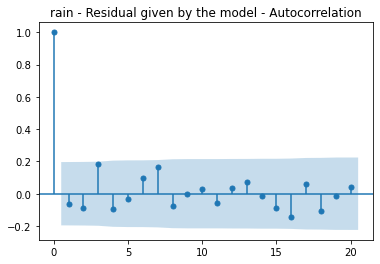

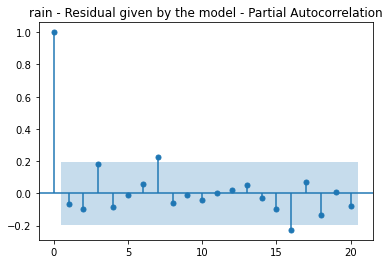

In [50]:
#Plotting acf & pacf - residual
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(rain_ses_res, lags=20, title='rain - Residual given by the model - Autocorrelation') 
plot_pacf(rain_ses_res, lags=20, title='rain - Residual given by the model - Partial Autocorrelation')

In [51]:
#Squaring residuals/ errors
rain_ses_se = pow(rain_ses_res,2)
rain_ses_se.head()

year
1813-01-01     1.597439
1814-01-01     1.552770
1815-01-01     8.784693
1816-01-01    41.166362
1817-01-01     1.378037
dtype: float64

In [52]:
#average/mean of squared residuals/ errors
rain_ses_mse = (rain_ses_se.sum())/len(rain_ses_se)
print(rain_ses_mse) #17.584652052034816

17.584652052034816


In [53]:
#Root of average/mean of squared residuals/ errors
rain_ses_rmse = sqrt(rain_ses_mse)
print(rain_ses_rmse) #4.193405781943219

4.193405781943219


In [54]:
#forecasting next 8 periods
rain_pred = rain_ses.forecast(steps=8)
print(rain_pred)

1913-01-01    24.823898
1914-01-01    24.823898
1915-01-01    24.823898
1916-01-01    24.823898
1917-01-01    24.823898
1918-01-01    24.823898
1919-01-01    24.823898
1920-01-01    24.823898
Freq: AS-JAN, dtype: float64


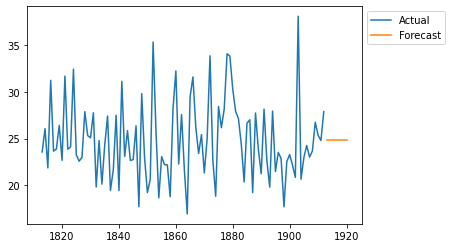

In [55]:
#Plot Actual & Forecast
plt.plot(rain)
plt.plot(rain_pred)
plt.legend(['Actual','Forecast'], bbox_to_anchor=(1, 1), loc=2)
plt.show()